In [1]:
import numpy as np
import skfuzzy as skf
from skfuzzy import control as sys

In [2]:
# Variable definitions

temperature = sys.Antecedent(np.arange(5, 35, 0.1), 'temperature')  # input
power = sys.Consequent(np.arange(0, 100, 0.1), 'power')  # output

c:\Users\batut\miniconda3\envs\a209\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


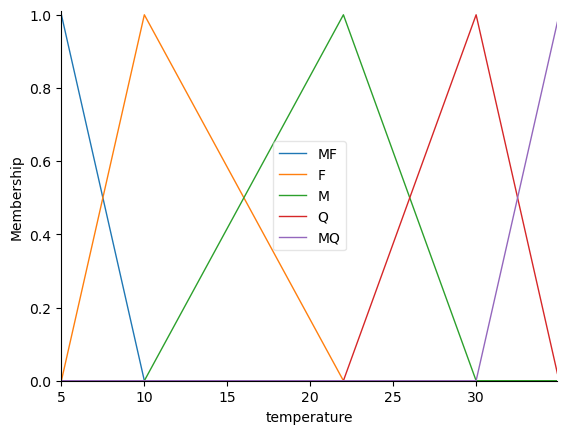

In [3]:
# Setting input functions

temperature['MF'] = skf.trimf(temperature.universe, [5, 5, 10])
temperature['F'] = skf.trimf(temperature.universe, [5, 10, 22])
temperature['M'] = skf.trimf(temperature.universe, [10, 22, 30])
temperature['Q'] = skf.trimf(temperature.universe, [22, 30, 35])
temperature['MQ'] = skf.trimf(temperature.universe, [30, 35, 35])

temperature.view()

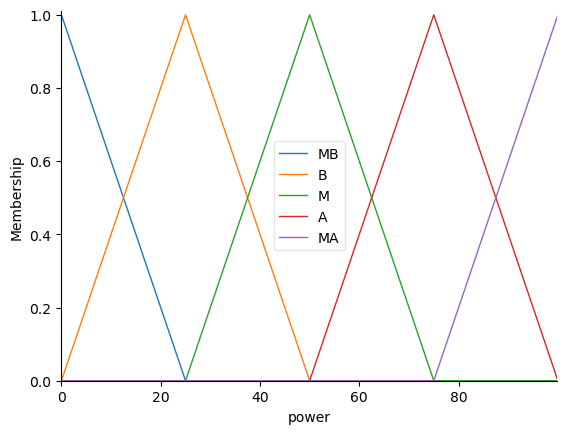

In [4]:
# Setting output functions

power['MB'] = skf.trimf(power.universe, [0, 0, 25])
power['B'] = skf.trimf(power.universe, [0, 25, 50])
power['M'] = skf.trimf(power.universe, [25, 50, 75])
power['A'] = skf.trimf(power.universe, [50, 75, 100])
power['MA'] = skf.trimf(power.universe, [75, 100, 100])

power.view()

In [5]:
# Defining rules

r1 = sys.Rule(temperature['MF'], power['MB'])
r2 = sys.Rule(temperature['F'], power['B'])
r3 = sys.Rule(temperature['M'], power['M'])
r4 = sys.Rule(temperature['Q'], power['A'])
r5 = sys.Rule(temperature['MQ'], power['MA'])

In [6]:
# Controller definition

rules = sys.ControlSystem([r1, r2, r3, r4, r5])
controller = sys.ControlSystemSimulation(rules)

47.17739858963871


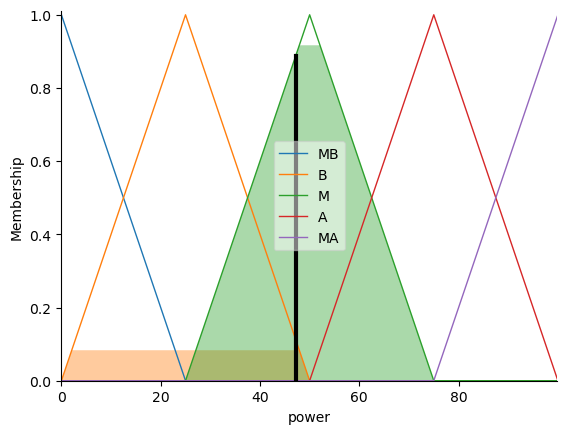

In [8]:
# Testing

controller.input['temperature'] = 21
controller.compute()
p = controller.output['power']

power.view(sim = controller)
print(p)

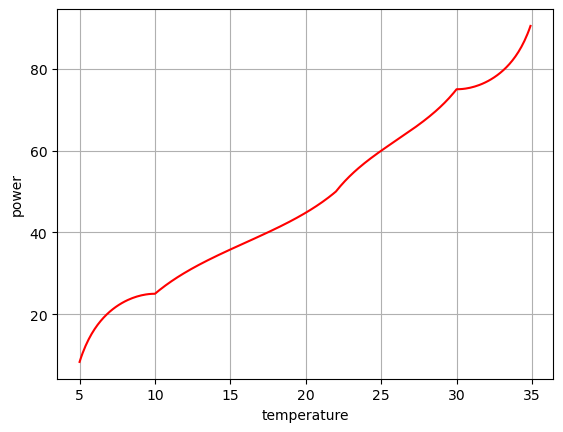

In [14]:
# Testing model for a temperature range

import matplotlib.pyplot as plt

tt = np.arange(5, 35, 0.1)
pp = list()

for c in tt:
  controller.input['temperature'] = c
  controller.compute()
  pp.append(controller.output['power'])

plt.plot(tt, pp, "r")
plt.xlabel("temperature")
plt.ylabel("power")
plt.grid()
plt.show()